In [1]:
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import pickle

In [2]:
cwd = os.getcwd()
print("The current working directory is {}".format(cwd))

The current working directory is E:\Study\ML Deployments\Heroku\Graduate_Admission\src


In [3]:
os.chdir("E:\Study\ML Deployments\Heroku\Graduate_Admission")
data_file_path = os.path.join(os.getcwd(),"data/Admission_Predict_Ver1.1.csv")

graduation_data = pd.read_csv(data_file_path)

In [4]:
graduation_data_new = pd.read_csv(data_file_path)

In [81]:
np.min(graduation_data_new["Chance of Admit "])

0.34

In [82]:
np.max(graduation_data_new["Chance of Admit "])

0.97

In [83]:
np.mean(graduation_data_new["Chance of Admit "])

0.7217399999999996

In [5]:
print("The columns of the graduation data are {}".format(graduation_data.columns))

The columns of the graduation data are Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [6]:
graduation_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
graduation_data.index = graduation_data["Serial No."]
graduation_data.drop(columns=["Serial No."],axis=1,inplace=True)

In [10]:
graduation_data.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [90]:
def scaling(df,columns,scaler):
    for i,column in tqdm(enumerate(columns),total=len(columns)):
        x = np.array(df[column])
        x = x.reshape(-1,1)
        scaler.fit(x)
        df[column] = scaler.transform(df[column])
    return df

In [91]:
pickle.dump(scaler,open(os.path.join(os.getcwd(),"scaler.sav"),"wb"))

In [21]:
numerical_columns = ['GRE Score', 'TOEFL Score', 'SOP',
       'LOR ', 'CGPA']

scaler = StandardScaler()

graduation_data = scaling(graduation_data,numerical_columns,scaler)

In [22]:
graduation_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,1.819238,1.778865,4,1.137360,1.098944,1.776806,1,0.92
2,0.667148,-0.031601,4,0.632315,1.098944,0.485859,1,0.76
3,-0.041830,-0.525364,3,-0.377773,0.017306,-0.954043,1,0.72
4,0.489904,0.462163,3,0.127271,-1.064332,0.154847,1,0.80
5,-0.219074,-0.689952,2,-1.387862,-0.523513,-0.606480,0,0.65


In [23]:
categorical_columns = ["University Rating","Research"]

graduation_data = pd.get_dummies(graduation_data,columns=categorical_columns,prefix_sep="_")

In [24]:
graduation_data.head()

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Chance of Admit,University Rating_1,University Rating_2,University Rating_3,University Rating_4,University Rating_5,Research_0,Research_1
Serial No.,,,,,,,,,,,,,
1,1.819238,1.778865,1.137360,1.098944,1.776806,0.92,0,0,0,1,0,0,1
2,0.667148,-0.031601,0.632315,1.098944,0.485859,0.76,0,0,0,1,0,0,1
3,-0.041830,-0.525364,-0.377773,0.017306,-0.954043,0.72,0,0,1,0,0,0,1
4,0.489904,0.462163,0.127271,-1.064332,0.154847,0.80,0,0,1,0,0,0,1
5,-0.219074,-0.689952,-1.387862,-0.523513,-0.606480,0.65,0,1,0,0,0,1,0


In [26]:
y = graduation_data["Chance of Admit "]
X = graduation_data.drop(columns=["Chance of Admit "],axis=1)

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
predictions = linear_reg.predict(X_test)

In [32]:
print(r2_score(y_test,predictions))

0.8167187910382006


In [36]:
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [37]:
predictions_1 = tree.predict(X_test)

In [38]:
print(r2_score(y_test,predictions_1))

0.5843815998169344


In [39]:
forest = RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [40]:
predictions_2 = forest.predict(X_test)

In [41]:
print(r2_score(y_test,predictions_2))

0.7859506350904868


In [42]:
neural = MLPRegressor()
neural.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [43]:
predictions_3 = neural.predict(X_test)

In [44]:
print(r2_score(y_test,predictions_3))

0.7151730916776515


In [47]:
svm = SVR()
svm.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [48]:
predictions_4 = svm.predict(X_test)

In [49]:
print(r2_score(y_test,predictions_4))

0.7180141118944114


In [51]:
er = VotingRegressor([('linear', linear_reg), ('random_forest', forest), ('neural_network',neural), ('svm',svm)])
er.fit(X_train,y_train)

VotingRegressor(estimators=[('linear',
                             LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False)),
                            ('random_forest',
                             RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   m

In [52]:
predictions_5 = er.predict(X_test)

In [53]:
print(r2_score(y_test,predictions_5))

0.8051934369238647


In [54]:
graduation_data_new = graduation_data.copy()

In [85]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.5)
ridge.fit(X_train,y_train)
predictions_6 = ridge.predict(X_test)

In [86]:
print(r2_score(y_test,predictions_6))

0.8167356146527431


In [58]:
correlation = graduation_data_new.corr()

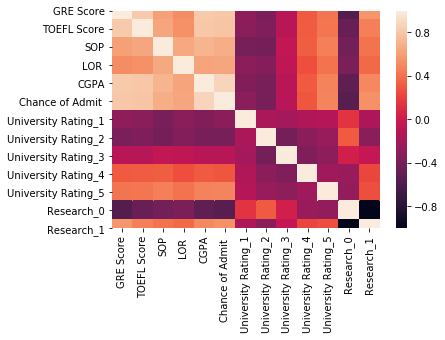

In [59]:
sns.heatmap(correlation)

In [63]:
output_model_path = os.path.join(os.getcwd(),"src/admission_model.pkl")

In [64]:
pickle.dump(linear_reg,open(output_model_path,"wb"))

In [88]:
output_model_path_1 = os.path.join(os.getcwd(),"src/admission_model_1.pkl")
pickle.dump(ridge,open(output_model_path_1,"wb"))

In [72]:
numerical_columns

['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA']

In [73]:
max_list = []
min_list = []
for i,j in enumerate(numerical_columns):
    max_list.append(np.max(graduation_data_new[j]))
    min_list.append(np.min(graduation_data_new[j]))

In [78]:
pickle.dump(max_list,open(os.path.join(os.getcwd(),"src/max_list.dat"),"wb"))
pickle.dump(min_list,open(os.path.join(os.getcwd(),"src/min_list.dat"),"wb"))

In [5]:
graduation_data_new.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [13]:
graduation_data_new.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,,
1,1,337,118,4,4.5,4.5,9.65,1,0.92
2,2,324,107,4,4.0,4.5,8.87,1,0.76
3,3,316,104,3,3.0,3.5,8.00,1,0.72
4,4,322,110,3,3.5,2.5,8.67,1,0.80
5,5,314,103,2,2.0,3.0,8.21,0,0.65


In [43]:
import os
import pickle
cwd = os.getcwd()

pickle.dump(linear_reg_new,open(os.path.join(cwd,"src/admission_predictor.pkl"),"wb"))
pickle.dump(vr,open(os.path.join(cwd,"src/admission_predictor_new.pkl"),"wb"))

In [42]:
import numpy as np
graduation_data_new.index = graduation_data_new["Serial No."]



graduation_data_new["SOP"].fillna(np.mean(graduation_data_new["SOP"]),inplace=True)
graduation_data_new["LOR "].fillna(np.mean(graduation_data_new["LOR "]),inplace=True)
graduation_data_new["GRE Score"].fillna(np.mean(graduation_data_new["GRE Score"]),inplace=True)
graduation_data_new["TOEFL Score"].fillna(np.mean(graduation_data_new["TOEFL Score"]),inplace=True)
graduation_data_new["CGPA"].fillna(np.mean(graduation_data_new["CGPA"]),inplace=True)

graduation_data_new["Research"].fillna(1,inplace=True)

graduation_data_new["University Rating"] = graduation_data_new["University Rating"].astype("category")
graduation_data_new["Research"] = graduation_data_new["Research"].astype("category")

max_list = pickle.load(open(os.path.join(cwd,"src/max_list.dat"),"rb"))
min_list = pickle.load(open(os.path.join(cwd,"src/min_list.dat"),"rb"))


numerical_variables = ["GRE Score","TOEFL Score","SOP","LOR ","CGPA"]

for max,min,actual in zip(max_list,min_list,numerical_variables):
    graduation_data_new[actual] = np.abs((min-graduation_data_new[actual])/(max-graduation_data_new[actual]))
    
#print(graduation_data_new.isna().sum())
    
y_new = graduation_data_new["Chance of Admit "]
X_new = graduation_data_new.drop(columns=["Chance of Admit "],axis=1)



from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import VotingRegressor
linear_reg_new = LinearRegression()
ridge = Ridge()
tree = DecisionTreeRegressor()
forest = RandomForestRegressor()
neural = MLPRegressor()
svm = SVR()

from sklearn.model_selection import train_test_split

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new,y_new,test_size=0.25,random_state=42)

linear_reg_new.fit(X_train_new,y_train_new)
ridge.fit(X_train_new,y_train_new)
tree.fit(X_train_new,y_train_new)
forest.fit(X_train_new,y_train_new)
neural.fit(X_train_new,y_train_new)
svm.fit(X_train_new,y_train_new)

y_pred_new = linear_reg_new.predict(X_test_new)
y_pred_new_1 = ridge.predict(X_test_new)
y_pred_new_2 = tree.predict(X_test_new)
y_pred_new_3 = forest.predict(X_test_new)
y_pred_new_4 = neural.predict(X_test_new)
y_pred_new_5 = svm.predict(X_test_new)

vr = VotingRegressor([('linear',linear_reg_new),('ridge',ridge),('forest',forest)],weights=[1,1,10])
vr.fit(X_train_new,y_train_new)

y_pred_new_6 = vr.predict(X_test_new)

from sklearn.metrics import r2_score

print(r2_score(y_test_new,y_pred_new))
print(r2_score(y_test_new,y_pred_new_1))
print(r2_score(y_test_new,y_pred_new_2))
print(r2_score(y_test_new,y_pred_new_3))
print(r2_score(y_test_new,y_pred_new_4))
print(r2_score(y_test_new,y_pred_new_5))
print(r2_score(y_test_new,y_pred_new_6))

print(y_pred_new_6)

0.5798990840746274
0.5795347669197973
0.4502543050230897
0.7082384648067688
-7.313285799045444
0.05546394965453039
0.7232015481576628
[0.83502723 0.85798123 0.44528197 0.68869116 0.7115582  0.86064535
 0.49687993 0.62861419 0.61840661 0.90877004 0.63172918 0.70120955
 0.83319588 0.91653944 0.77536995 0.53852147 0.88804086 0.54121388
 0.6414683  0.61903269 0.66517857 0.75529145 0.79443817 0.80353595
 0.63132919 0.75079058 0.88806317 0.84535397 0.58948662 0.80264271
 0.63784414 0.59137691 0.63918487 0.85518007 0.74650371 0.77902939
 0.54748689 0.93229993 0.70106282 0.56166533 0.83711714 0.56691665
 0.6653728  0.85031393 0.91813719 0.60471889 0.7834169  0.79103961
 0.68879628 0.93601448 0.93232224 0.69114018 0.73596111 0.54741471
 0.87358868 0.64840898 0.90548453 0.65916291 0.70940443 0.60224933
 0.74032536 0.72780187 0.62137972 0.78038772 0.5753057  0.56362833
 0.9072812  0.88853221 0.71578371 0.65999044 0.66230583 0.75436863
 0.63094992 0.58142827 0.55312729 0.63000111 0.7773872  0.8576